In [1]:
from pandas import read_csv
import numpy 
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import statsmodels.api as sm
from sklearn import metrics
import random
import csv

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series1 = read_csv('output3rdformat.csv')
X1 = series1.values
print(series1.columns)
print(series1)
print(series1.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.003067   
1        2                         1.049869                          0.009975   
2        3                         0.640267                          0.012469   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.064838   
5        6                         0.297866                          0.329177   
6        7                         0.400244                          0.496259   
7        8                         0.373951                          0.725686   
8        9                         0.449943                          0.610973 

In [3]:
y1= series1['Fuel Oil Consumption(Actual)']
X1= series1.drop('Fuel Oil Consumption(Actual)',axis = 1)

In [4]:
X_train1 = X1.iloc[0:157,:]
X_test1 = X1.iloc[156:168,:]
print(X_train1.shape)
print(X_test1.shape)

(157, 4)
(12, 4)


In [6]:
print(X_train1)
print(X_test1)

     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.003067   
1        2                         1.049869                          0.009975   
2        3                         0.640267                          0.012469   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.064838   
5        6                         0.297866                          0.329177   
6        7                         0.400244                          0.496259   
7        8                         0.373951                          0.725686   
8        9                         0.449943                          0.610973   
9       10                         0.459995                          0.418953   
10      11                         0.541709                          0.162095   
11      12                  

In [10]:
y_train1 = y1.iloc[:157]
y_test1 = y1.iloc[156:168]
print(y_train1.shape)
print(y_test1.shape)

(157,)
(12,)


In [13]:
print(y_train1)
print(y_test1)

0      0.97
1      0.84
2      0.63
3      0.49
4      0.35
5      0.34
6      0.32
7      0.36
8      0.39
9      0.46
10     0.55
11     0.73
12     0.79
13     0.75
14     0.65
15     0.42
16     0.38
17     0.35
18     0.30
19     0.37
20     0.38
21     0.41
22     0.54
23     0.73
24     0.70
25     0.75
26     0.65
27     0.39
28     0.32
29     0.28
       ... 
127    0.12
128    0.19
129    0.26
130    0.44
131    0.57
132    0.71
133    0.83
134    0.49
135    0.27
136    0.15
137    0.10
138    0.10
139    0.12
140    0.18
141    0.29
142    0.35
143    0.45
144    0.63
145    0.62
146    0.38
147    0.26
148    0.16
149    0.10
150    0.08
151    0.11
152    0.15
153    0.25
154    0.35
155    0.59
156    0.61
Name: Fuel Oil Consumption(Actual), Length: 157, dtype: float64
156    0.61
157    0.52
158    0.47
159    0.23
160    0.16
161    0.12
162    0.10
163    0.12
164    0.16
165    0.28
166    0.37
167    0.52
Name: Fuel Oil Consumption(Actual), dtype: float64


In [14]:
scaler = pre.StandardScaler().fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

[ 0.71003021  0.54363979  0.40022224  0.36619478  0.21919738  0.20151872
  0.17470502  0.19408364  0.1970171   0.23476764  0.41111656  0.53495518]


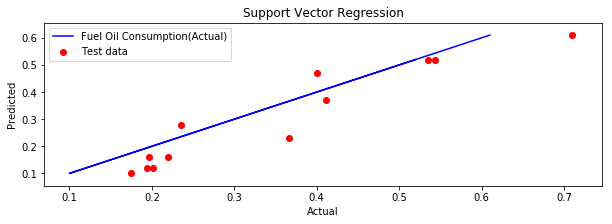

Mean Squared Error(MSE): 0.005044


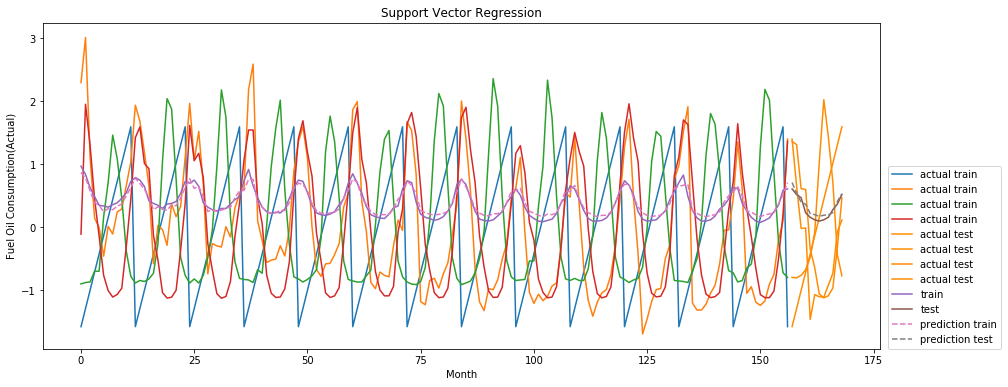

In [16]:
n_train1=157
svr1=svm.SVR(kernel="rbf", gamma=0.1)
svr2=svr1.fit(X_train_scaled,y_train1)
y_pred1=svr1.predict(X_test_scaled)
print(y_pred1)
y_pred_train1=svr1.predict(X_train_scaled)
pyplot.figure(figsize=(10, 3))
lw=2
pyplot.scatter(y_pred1,y_test1,color='red',label='Test data')
pyplot.plot(y_test1,y_test1,color='blue')
pyplot.ylabel('Predicted')
pyplot.xlabel('Actual')
#pyplot.scatter(X_test1,y_test1,color='darkorange',label='Test data')
#pyplot.plot(X_test1,y_pred1,color='navy',lw=lw,label='RBF model')
#pyplot.xlabel('Features')
#pyplot.ylabel('Fuel Oil Consumption(Actual)')
pyplot.title('Support Vector Regression')
pyplot.legend()
pyplot.show()
pyplot.plot(range(n_train1),X_train_scaled,label="actual train")
pyplot.plot(range(n_train1, len(X_test_scaled) + n_train1),X_test_scaled,color='darkorange',label="actual test")
pyplot.plot(range(n_train1), y_train1, label="train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_test1, '-', label="test")
pyplot.plot(range(n_train1), y_pred_train1, '--', label="prediction train")
pyplot.plot(range(n_train1, len(y_test1) + n_train1), y_pred1, '--',label="prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.xlabel("Month")
pyplot.ylabel("Fuel Oil Consumption(Actual)")
pyplot.title("Support Vector Regression")
error1=mean_squared_error(y_test1,y_pred1)
print('Mean Squared Error(MSE): %.6f' % error1)

In [ ]:
series1 = read_csv('output3rd.csv')
X1 = series1.values
print(series1.columns)
print(series1)
print(series1.describe())

In [ ]:
y1= series1['Fuel Oil Consumption(Actual)']
X1= series1.drop('Fuel Oil Consumption(Actual)',axis = 1)

In [ ]:
X_train1 = X1.iloc[0:157,:]
X_test1 = X1.iloc[156:168,:]
y_train1 = y1.iloc[:157]
y_test1 = y1.iloc[156:168]